## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice.

mice_count = combined_data['Mouse ID'].count()
mice_count

1893

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouseID_timepoint_duplicate = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
mouseID_timepoint_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 

mouseID_duplicate = combined_data[combined_data.duplicated(['Mouse ID'])]
mouseID_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_data = combined_data.drop_duplicates("Mouse ID")
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [51]:
# Checking the number of mice in the clean DataFrame.

cleaned_data = clean_combined_data['Mouse ID'].count()
cleaned_data

249

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

mean_drug_regimen = combined_data.groupby('Drug Regimen') ['Tumour Volume (mm3)'].mean()
median_drug_regimen = combined_data.groupby('Drug Regimen') ['Tumour Volume (mm3)'].median()
variance_drug_regimen = combined_data.groupby('Drug Regimen') ['Tumour Volume (mm3)'].var()
sd_drug_regimen = combined_data.groupby('Drug Regimen') ['Tumour Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen') ['Tumour Volume (mm3)'].sem()

stat_summary_data = pd.DataFrame({"Mean": mean_drug_regimen, "Median": median_drug_regimen,
                                  "Variance": variance_drug_regimen, "Standard Deviation": sd_drug_regimen,
                                  "SEM": sem})
stat_summary_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stat_summary_data


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


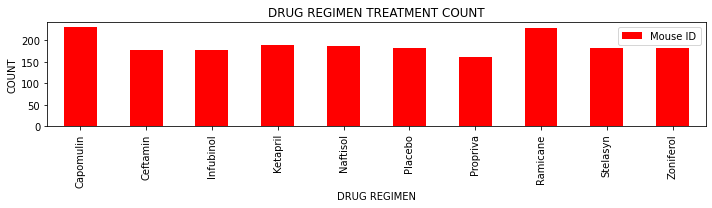

In [89]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugregimen = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()
drugregimen_data = drugregimen[["Drug Regimen", "Mouse ID"]]
drugregimen_data = drugregimen_data.set_index("Drug Regimen")

drugregimen_data.plot(kind="bar", figsize=(10,3), color="red")

plt.title("DRUG REGIMEN TREATMENT COUNT")
plt.xlabel("DRUG REGIMEN")
plt.ylabel("COUNT")

plt.tight_layout()
plt.show()

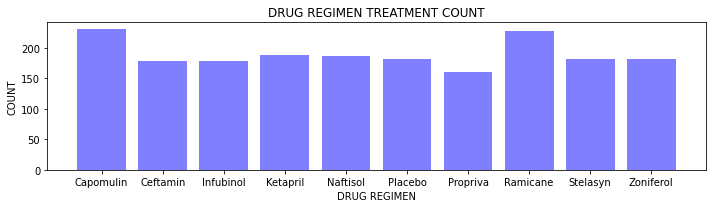

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen1 = stat_summary_data.index.tolist()

drug_count = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
plt.figure(figsize=(10,3))
plt.bar(drug_regimen1, drug_count, color="blue", alpha=0.5, align="center")


plt.title("DRUG REGIMEN TREATMENT COUNT")
plt.xlabel("DRUG REGIMEN")
plt.ylabel("COUNT")
plt.tight_layout()

Text(0.5, 1.0, 'Female versus Male Mice Percentage')

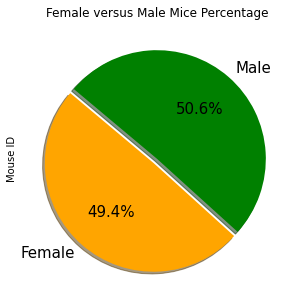

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colours = ["orange", "green"]
explode = (0.050,0)
femaleVmale_chart = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()
femaleVmale_chart = femaleVmale_chart[["Sex", "Mouse ID"]]
femaleVmale_chart.plot(kind="pie", y="Mouse ID", figsize=(5,5), autopct='%1.1f%%', colors= colours,
                      startangle=140, shadow=True, labels=femaleVmale_chart["Sex"], legend=False, explode= explode,
                      fontsize=15)
plt.title("Female versus Male Mice Percentage")

Text(0.5, 1.0, 'FEMALE VERSUS MALE MICE PERCENTAGE')

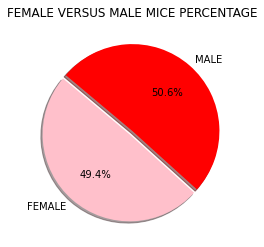

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ["FEMALE", "MALE"]
percentage = [49.4, 50.6]
colours = ['pink','red']
explode = (0.050, 0)
plt.pie(percentage, labels=gender, explode=explode, colors=colours, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("FEMALE VERSUS MALE MICE PERCENTAGE")

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_treatments = combined_data.set_index("Drug Regimen").loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
final_treatments = final_treatments.groupby("Mouse ID")["Timepoint"].max()
final_treatments = pd.DataFrame(final_treatments).reset_index()
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merged_treatments = pd.merge(combined_data, final_treatments, on = ["Timepoint", "Mouse ID"])
merged_treatments

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumour vol data (for plotting)
treatment_lists = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_treatments["Tumour Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of the Tumour Volume (mm3) is {lowerq}.")
print(f"The upper quartile of the Tumour Volume (mm3) is {upperq}.")
print(f"The Interquartile range of the Tumour Volume (mm3) is {iqr}.")

# Locate the rows which contain mice on each drug and get the tumour volumes
for treatment in treatments:
    for index, row in merged_treatments.iterrows():
        if row["Drug Regimen"] == treatment:
            treatment_lists.setdefault(treatment, []).append(row["Tumour Volume (mm3)"])
frame= pd.DataFrame(treatment_lists)
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers")
print(f"Values below {upper_bound} could be outliers")

The lower quartile of the Tumour Volume (mm3) is 37.1877438025.
The upper quartile of the Tumour Volume (mm3) is 59.930261755.
The Interquartile range of the Tumour Volume (mm3) is 22.742517952499995.
Values below 3.0739668737500097 could be outliers
Values below 94.04403868374999 could be outliers


Text(0.5, 1.0, 'VARIABILITY OF THE TOP 4 DRUG REGIMENS')

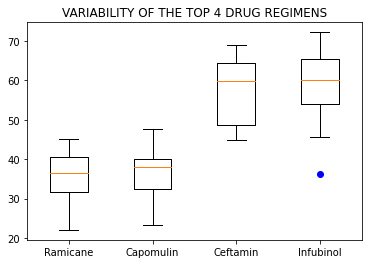

In [103]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
plt.boxplot([frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], frame["Infubinol"]], labels=treatments, sym="b")
plt.title("VARIABILITY OF THE TOP 4 DRUG REGIMENS")

## Line and Scatter Plots

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

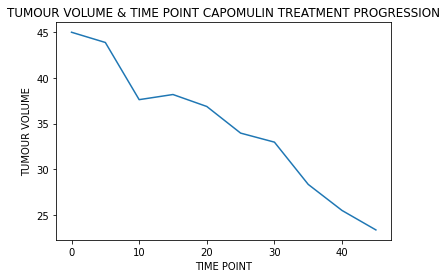

In [108]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
s185 = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"].loc[combined_data["Mouse ID"] == "s185"]

lx_axis = s185["Timepoint"].tolist()
ly_axis = s185["Tumour Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("TIME POINT")
plt.ylabel("TUMOUR VOLUME")
plt.title("TUMOUR VOLUME & TIME POINT CAPOMULIN TREATMENT PROGRESSION")
lx_axis

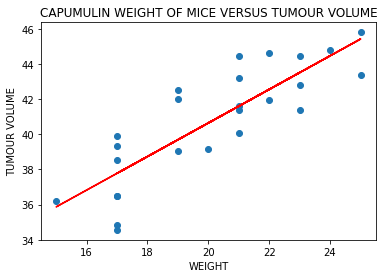

In [110]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
tv_mouse_weight = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis = tv_mouse_weight["Weight (g)"]
sy_axis = tv_mouse_weight["Tumour Volume (mm3)"]

correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

plt.scatter(sx_axis, sy_axis)
plt.title("CAPUMULIN WEIGHT OF MICE VERSUS TUMOUR VOLUME")
plt.xlabel("WEIGHT")
plt.ylabel("TUMOUR VOLUME")
plt.plot(sx_axis,regress_values, "r-")

## Correlation and Regression

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept
print(f"The Correlation for both factors are {round(correlation[0],2)}")
print(f"The Linear Regression model: Y = {round(slope, 2)}x + {round(intercept, 2)}")

The Correlation for both factors are 0.84
The Linear Regression model: Y = 0.95x + 21.55
